In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import optimizers
import tensorflow as tf
import math
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from keras.layers import Bidirectional
from keras import callbacks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
stock='/content/drive/MyDrive/Colab Notebooks/OilWTI.csv'
data=pd.read_csv(stock)

In [ ]:
data.shape

(4855, 7)

In [ ]:
data.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.        109
Change %      0
dtype: int64

In [ ]:
data.head(4855)

,Date,Price,Open,High,Low,Vol.,Change %
0,5/1/2004,33.78,32.40,33.95,32.27,105.70K,3.87%
1,6/1/2004,33.70,33.76,34.35,33.30,103.41K,-0.24%
2,7/1/2004,33.62,33.68,33.89,33.05,81.68K,-0.24%
3,8/1/2004,33.98,33.65,34.00,33.40,92.71K,1.07%
4,9/1/2004,34.31,34.05,34.70,34.05,104.69K,0.97%
...,...,...,...,...,...,...,...
4850,7/11/2022,91.79,91.00,93.74,90.40,322.42K,-0.89%
4851,8/11/2022,88.91,91.87,92.17,88.52,344.22K,-3.14%
4852,9/11/2022,85.83,88.57,89.24,85.50,388.30K,-3.46%
4853,10/11/2022,86.47,85.85,87.35,84.70,340.01K,0.75%


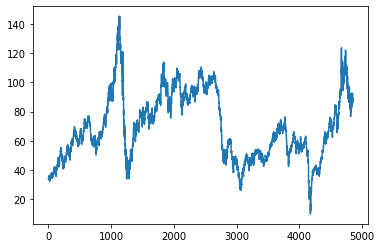

In [ ]:
data1=data.iloc[:,1:2].values
data1
plt.plot(data1)

In [ ]:
data_train = data1[0:np.int16(0.8*data1.shape[0])]
data_test = data1[np.int16(0.8*data1.shape[0]):]

In [ ]:
data_train.mean()
data_z = (data_train-data_train.mean())/(data_train.std())
data_z.mean()

-2.9270555541095787e-16

In [ ]:
x_train = []
y_train = []

for i in range (5, len(data_z)):
  x_train.append(data_z[i-5:i,0])
  y_train.append(data_z[i,0])
  if i<=10:
    print(x_train)
    print(y_train)
    print()

[array([-1.61913804, -1.6226419 , -1.62614575, -1.61037841, -1.59592503])]
[-1.5779677851991325]

[array([-1.61913804, -1.6226419 , -1.62614575, -1.61037841, -1.59592503]), array([-1.6226419 , -1.62614575, -1.61037841, -1.59592503, -1.57796779])]
[-1.5779677851991325, -1.590669248219644]

[array([-1.61913804, -1.6226419 , -1.62614575, -1.61037841, -1.59592503]), array([-1.6226419 , -1.62614575, -1.61037841, -1.59592503, -1.57796779]), array([-1.62614575, -1.61037841, -1.59592503, -1.57796779, -1.59066925])]
[-1.5779677851991325, -1.590669248219644, -1.5876033778353826]

[array([-1.61913804, -1.6226419 , -1.62614575, -1.61037841, -1.59592503]), array([-1.6226419 , -1.62614575, -1.61037841, -1.59592503, -1.57796779]), array([-1.62614575, -1.61037841, -1.59592503, -1.57796779, -1.59066925]), array([-1.61037841, -1.59592503, -1.57796779, -1.59066925, -1.58760338])]
[-1.5779677851991325, -1.590669248219644, -1.5876033778353826, -1.6340294150827708]

[array([-1.61913804, -1.6226419 , -1.6261

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[-1.61913804],
        [-1.6226419 ],
        [-1.62614575],
        [-1.61037841],
        [-1.59592503]],

       [[-1.6226419 ],
        [-1.62614575],
        [-1.61037841],
        [-1.59592503],
        [-1.57796779]],

       [[-1.62614575],
        [-1.61037841],
        [-1.59592503],
        [-1.57796779],
        [-1.59066925]],

       ...,

       [[-0.66871823],
        [-0.66784226],
        [-0.60477293],
        [-0.59250945],
        [-0.65470282]],

       [[-0.66784226],
        [-0.60477293],
        [-0.59250945],
        [-0.65470282],
        [-0.62010228]],

       [[-0.60477293],
        [-0.59250945],
        [-0.65470282],
        [-0.62010228],
        [-0.62141623]]])

Epoch 1/100
194/194 [==============================] - 6s 12ms/step - loss: 0.1304
Epoch 2/100
194/194 [==============================] - 2s 12ms/step - loss: 0.0712
Epoch 3/100
194/194 [==============================] - 2s 12ms/step - loss: 0.0622
Epoch 4/100
194/194 [==============================] - 2s 11ms/step - loss: 0.0619
Epoch 5/100
194/194 [==============================] - 2s 12ms/step - loss: 0.0572
Epoch 6/100
194/194 [==============================] - 2s 12ms/step - loss: 0.0541
Epoch 7/100
194/194 [==============================] - 2s 12ms/step - loss: 0.0540
Epoch 8/100
194/194 [==============================] - 2s 12ms/step - loss: 0.0554
Epoch 9/100
194/194 [==============================] - 2s 12ms/step - loss: 0.0516
Epoch 10/100
194/194 [==============================] - 2s 12ms/step - loss: 0.0536
Epoch 11/100
194/194 [==============================] - 2s 12ms/step - loss: 0.0535
Epoch 12/100
194/194 [==============================] - 2s 12ms/step - loss: 0.0539
E

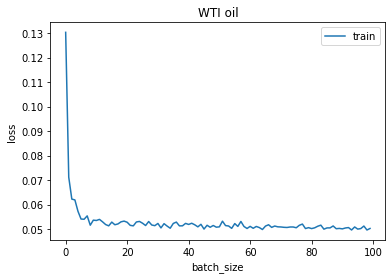

In [ ]:
from typing import Sequence
model = Sequential()
model.add(Conv1D(64, 1, activation='relu',  input_shape=(x_train.shape[1],1)))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(128, 1, activation='relu'))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')
history=model.fit(x_train,y_train, epochs=100, batch_size=20)
plt.plot(history.history['loss'], label='train')
plt.title('WTI oil')
plt.ylabel('loss')
plt.xlabel('batch_size')
plt.legend()
plt.show()

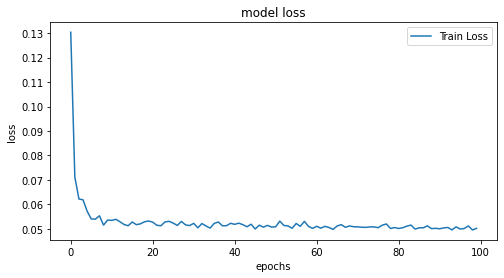

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
data_z_test = (data_test-data_train.mean())/(data_train.std())

In [ ]:
x_test = []
y_test = []

for i in range (5, len(data_z_test)):
  x_test.append(data_z_test[i-5:i,0])
  y_test.append(data_z_test[i,0])
  if i<=10:
    print(x_test)
    print(y_test)
    print()

[array([-0.61703641, -0.64287732, -0.61134265, -0.6078388 , -0.54695937])]
[-0.5316300211990413]

[array([-0.61703641, -0.64287732, -0.61134265, -0.6078388 , -0.54695937]), array([-0.64287732, -0.61134265, -0.6078388 , -0.54695937, -0.53163002])]
[-0.5316300211990413, -0.5355718545502345]

[array([-0.61703641, -0.64287732, -0.61134265, -0.6078388 , -0.54695937]), array([-0.64287732, -0.61134265, -0.6078388 , -0.54695937, -0.53163002]), array([-0.61134265, -0.6078388 , -0.54695937, -0.53163002, -0.53557185])]
[-0.5316300211990413, -0.5355718545502345, -0.5106069099926769]

[array([-0.61703641, -0.64287732, -0.61134265, -0.6078388 , -0.54695937]), array([-0.64287732, -0.61134265, -0.6078388 , -0.54695937, -0.53163002]), array([-0.61134265, -0.6078388 , -0.54695937, -0.53163002, -0.53557185]), array([-0.6078388 , -0.54695937, -0.53163002, -0.53557185, -0.51060691])]
[-0.5316300211990413, -0.5355718545502345, -0.5106069099926769, -0.5132347988934726]

[array([-0.61703641, -0.64287732, -0.6

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_test.shape

(966, 5, 1)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions_r = ((predictions*(data_train.std()))+(data_train.mean()))

In [ ]:
predictions_r.shape

(966, 1)

In [ ]:
mae = mean_absolute_error(data_test[5:],predictions_r)
mae

1.3817694676243246

In [ ]:
mape=mean_absolute_percentage_error(data_test[5:],predictions_r)
mape

0.02344873726441357

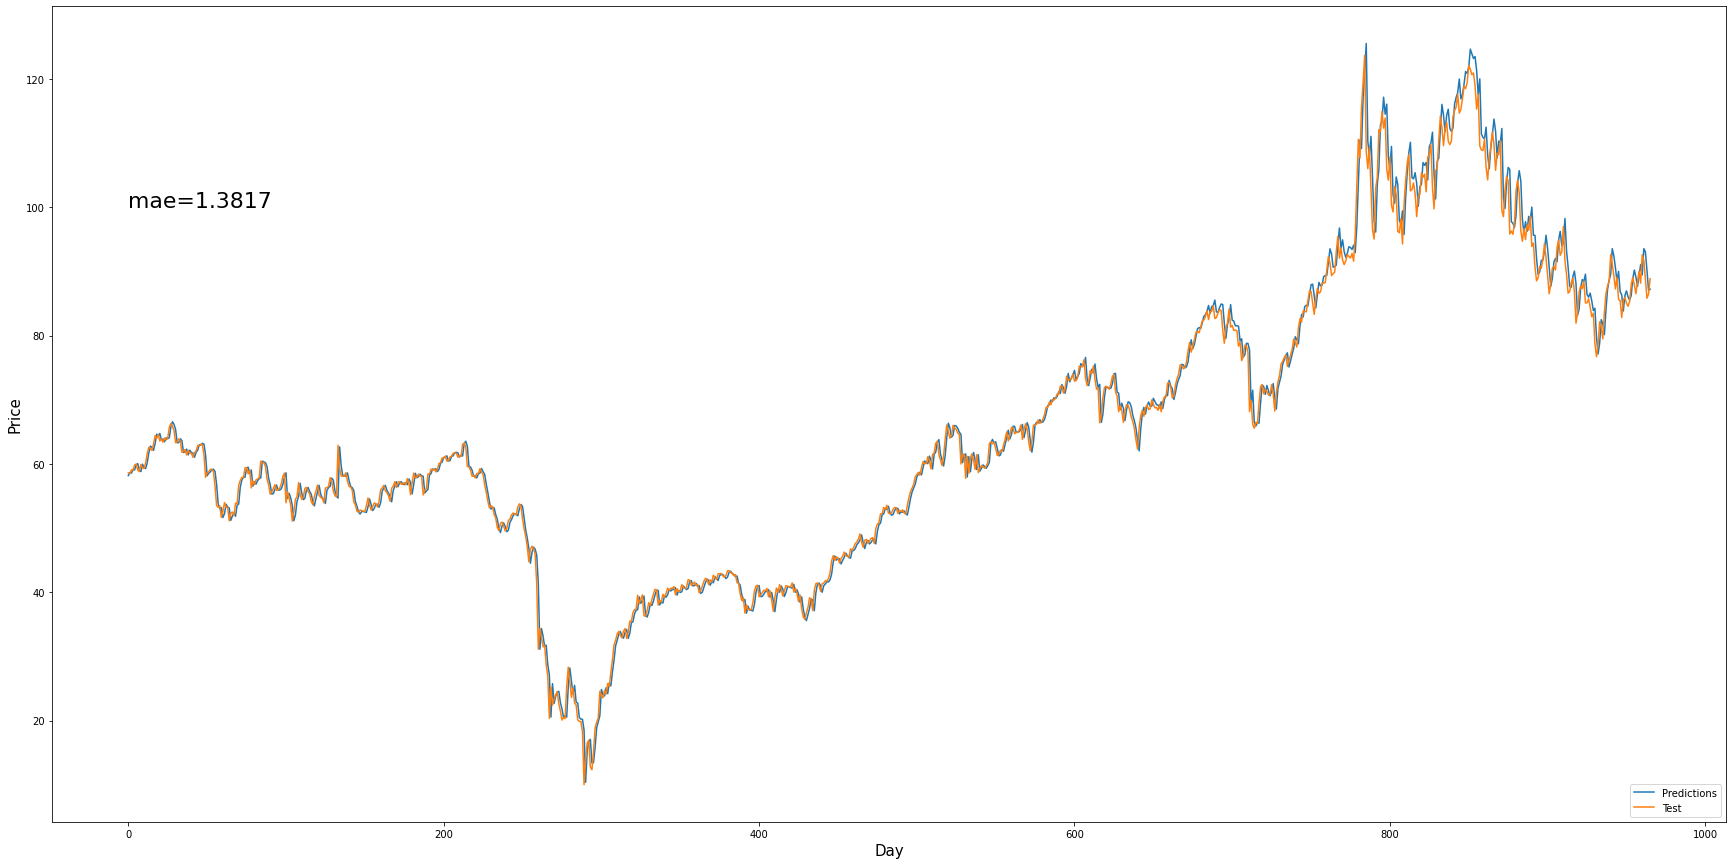

In [ ]:
plt.figure(figsize=(30, 15))
plt.text(0,100,'mae=1.3817', fontsize=22)
plt.plot(predictions_r)
plt.plot(data_test[5:])
plt.legend(['Predictions','Test'], loc='lower right')
plt.ylabel('Price',fontsize = 15)
plt.xlabel('Day',fontsize = 15)
plt.show()